In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
# Load the datasets
apps = pd.read_csv("C:\\Users\\terre\\Downloads\\googleplaystore.csv")
reviews = pd.read_csv("C:\\Users\\terre\\Downloads\\googleplaystore_user_reviews.csv")

In [3]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
# Merge the two datasets on 'App' column
merged_df = pd.merge(apps, reviews, on='App', how='inner')

In [6]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [7]:
merged_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [8]:
merged_df.isnull().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

In [9]:
apps.shape

(10841, 13)

In [10]:
reviews.shape

(64295, 5)

In [11]:
merged_df.shape

(122662, 17)

In [12]:
# Check for duplicates
merged_df.duplicated().sum()

81001

In [13]:
# Drop duplicate rows
merged_df.drop_duplicates(subset='Translated_Review', inplace=True)

In [14]:
# Check for duplicates
merged_df.duplicated().sum()

0

In [15]:
# Drop unnecessary columns
merged_df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

In [16]:
# Clean the 'Category' column
merged_df['Category'] = merged_df['Category'].str.replace('_', ' ').str.title()

# Clean the 'Installs' column
merged_df['Installs'] = merged_df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

C:\Users\terre\AppData\Local\Temp\ipykernel_9324\4108040912.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['Installs'] = merged_df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)


In [17]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",like,Neutral,0.000,0.000000
3,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",NaN,NaN,NaN,NaN
4,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",I love colors inspyering,Positive,0.500,0.600000


In [ ]:
# Define a function to calculate polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the function to 'Translated_Review' column
merged_df['Polarity'], merged_df['Subjectivity'] = zip(*merged_df['Translated_Review'].apply(get_sentiment))

# Visualize the distribution of polarity and subjectivity scores
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=merged_df, x='Polarity', ax=axes[0])
sns.histplot(data=merged_df, x='Subjectivity', ax=axes[1])
plt.show()

# Count the number of reviews for each unique subjectivity and polarity score
print(merged_df['Subjectivity'].value_counts())
print(merged_df['Polarity'].value_counts())

In [18]:
# Remove any null values from the review column
merged_df.dropna(subset=['Translated_Review'], inplace=True)

In [20]:
# Convert the review text to lowercase
merged_df['review_text'] = merged_df['Translated_Review'].str.lower()

In [21]:
# Remove any punctuation or special characters from the review text
merged_df['review_text'] = merged_df['review_text'].str.replace('[^\w\s]', '')

C:\Users\terre\AppData\Local\Temp\ipykernel_9324\3301282486.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['review_text'] = merged_df['review_text'].str.replace('[^\w\s]', '')


In [22]:
# Remove any digits from the review text
merged_df['review_text'] = merged_df['review_text'].str.replace('\d+', '')

C:\Users\terre\AppData\Local\Temp\ipykernel_9324\2820637170.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['review_text'] = merged_df['review_text'].str.replace('\d+', '')


In [23]:
# Remove any extra whitespaces from the review text
merged_df['review_text'] = merged_df['review_text'].str.strip()

In [24]:
# Define a function to calculate polarity and subjectivity of a given text
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    return polarity, subjectivity

# Apply the sentiment analysis function to each review text in the dataset
merged_df['polarity'], merged_df['subjectivity'] = zip(*merged_df['review_text'].apply(get_sentiment))


In [32]:

# Perform sentiment analysis using TextBlob
def get_sentiment(polarity):
    if polarity == 0:
        return 'neutral'
    elif polarity > 0:
        return 'positive'
    else:
        return 'negative'

In [33]:
merged_df['Polarity'] = merged_df['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['Sentiment'] = merged_df['Polarity'].apply(get_sentiment)


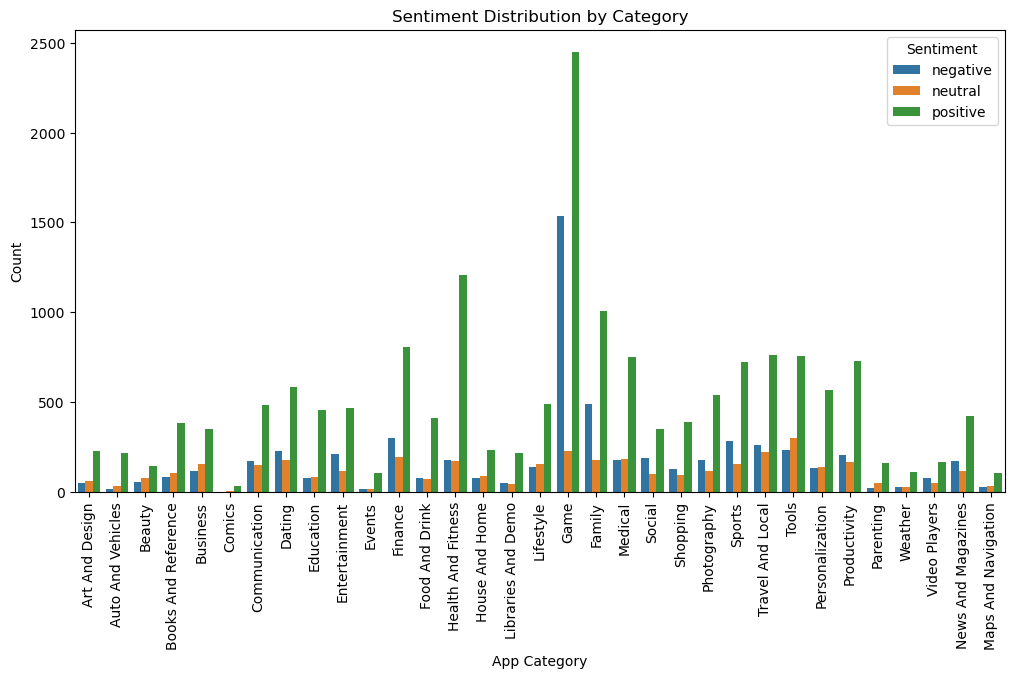

In [36]:
# Create a stacked bar chart to show sentiment distribution by category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Sentiment', data=merged_df)
plt.title('Sentiment Distribution by Category')
plt.xlabel('App Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

In [31]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,review_text,polarity,subjectivity
0,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,a kids excessive ads the types ads allowed app...,-0.25,1.000000
1,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",It bad >:(,Negative,-0.725,0.833333,it bad,-0.70,0.666667
2,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",like,Neutral,0.000,0.000000,like,0.00,0.000000
4,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",I love colors inspyering,Positive,0.500,0.600000,i love colors inspyering,0.50,0.600000
5,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",I hate,Negative,-0.800,0.900000,i hate,-0.80,0.900000


In [26]:
# Group the data by app and calculate the average polarity and subjectivity for each app
merged_sentiment_df = merged_df.groupby('App').agg({'polarity': 'mean', 'subjectivity': 'mean'}).reset_index()

In [27]:
# Sort the apps by average polarity in descending order to identify positively or negatively rated apps
top_positively_rated_apps = merged_sentiment_df.sort_values('polarity', ascending=False).head(10)
top_negatively_rated_apps = merged_sentiment_df.sort_values('polarity', ascending=True).head(10)

In [28]:
# Print the top positively and negatively rated apps
print("Top 10 Positively Rated Apps:")
print(top_positively_rated_apps[['App', 'polarity']])
print("\nTop 10 Negatively Rated Apps:")
print(top_negatively_rated_apps[['App', 'polarity']])

Top 10 Positively Rated Apps:
                                                   App  polarity
795                                           HomeWork  1.000000
707                                      Google Slides  0.933333
404  Daily Workouts - Exercise Fitness Routine Trainer  0.800000
652                                       GPS Map Free  0.700000
304                     Cameringo Lite. Filters Camera  0.642857
274                       CM Flashlight (Compass, SOS)  0.633333
12                          3D Live Neon Weed Launcher  0.568182
365                                   Cookbook Recipes  0.533938
20                              850 Sports News Digest  0.531424
204  Best Ovulation Tracker Fertility Calendar App ...  0.525000

Top 10 Negatively Rated Apps:
                                App  polarity
413              Davis's Drug Guide -0.500000
708              Google Street View -0.400000
394                DEER HUNTER 2018 -0.383333
632     Fruit Block - Puzzle Legend -0.1

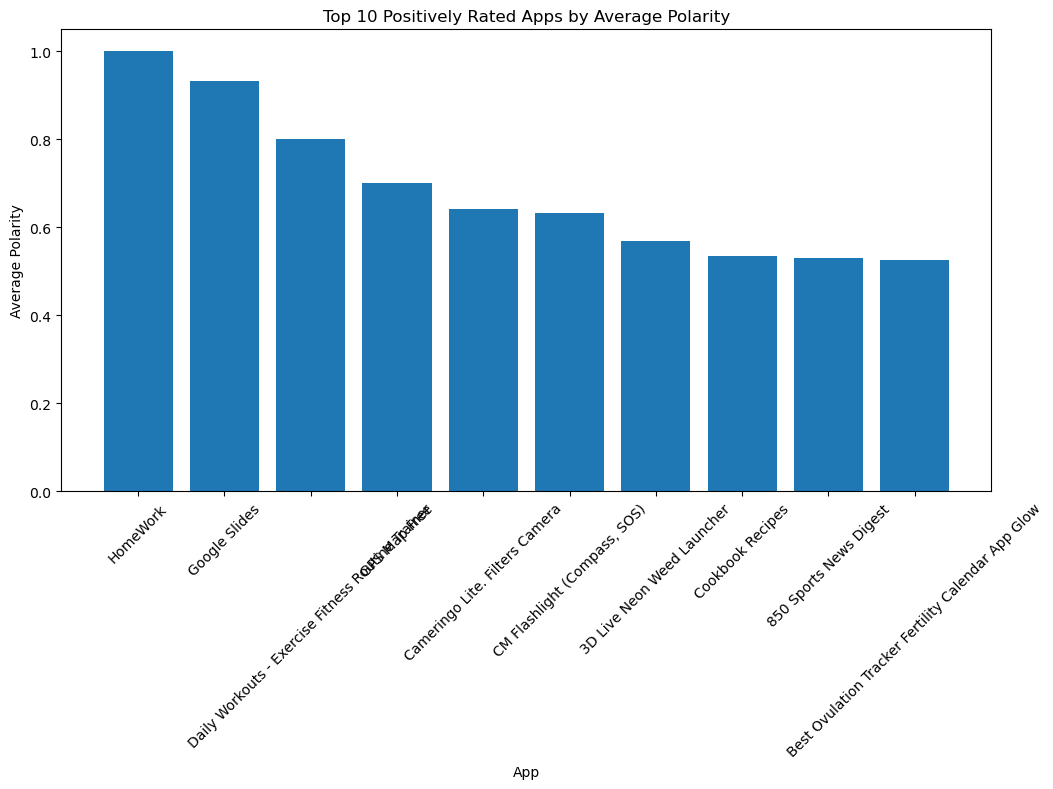

In [29]:
# Plot a bar chart for average polarity of top 10 positively rated apps
plt.figure(figsize=(12, 6))
plt.bar(top_positively_rated_apps['App'], top_positively_rated_apps['polarity'])
plt.title('Top 10 Positively Rated Apps by Average Polarity')
plt.xlabel('App')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()

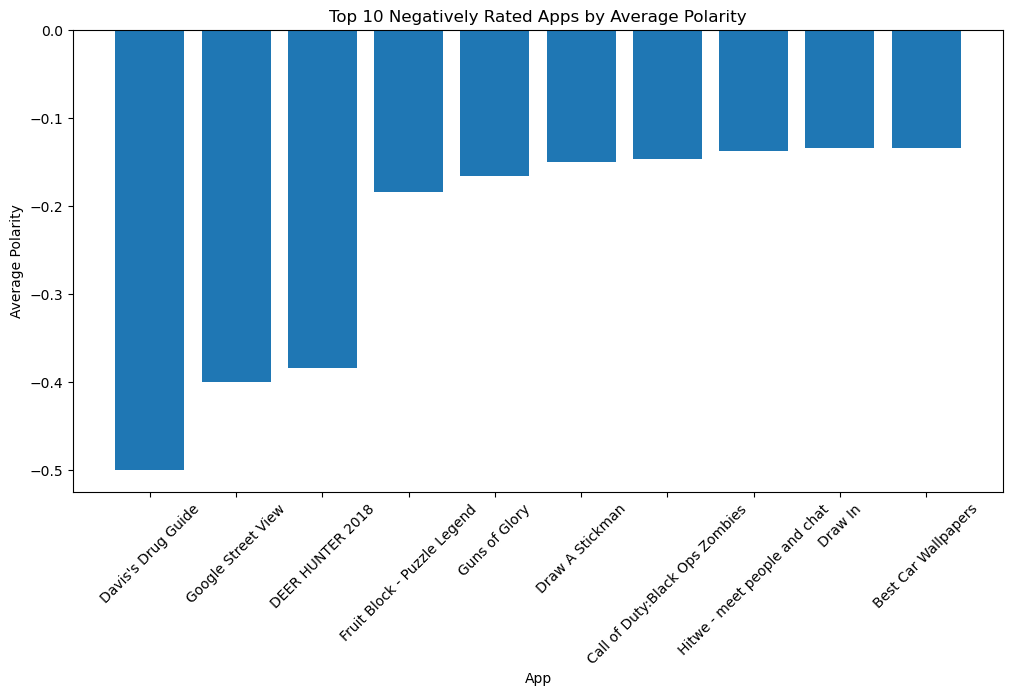

In [30]:
# Plot a bar chart for average polarity of top 10 negatively rated apps
plt.figure(figsize=(12, 6))
plt.bar(top_negatively_rated_apps['App'], top_negatively_rated_apps['polarity'])
plt.title('Top 10 Negatively Rated Apps by Average Polarity')
plt.xlabel('App')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()

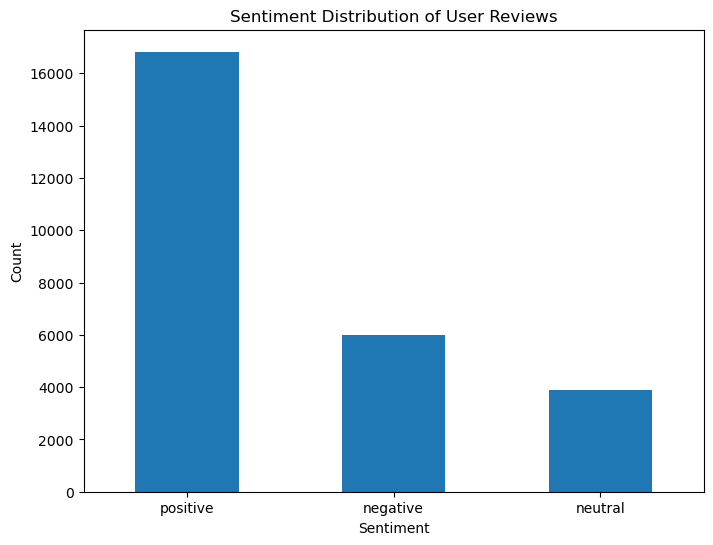

In [34]:
# Visualize the sentiment distribution
sentiment_counts = merged_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6), rot=0)
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

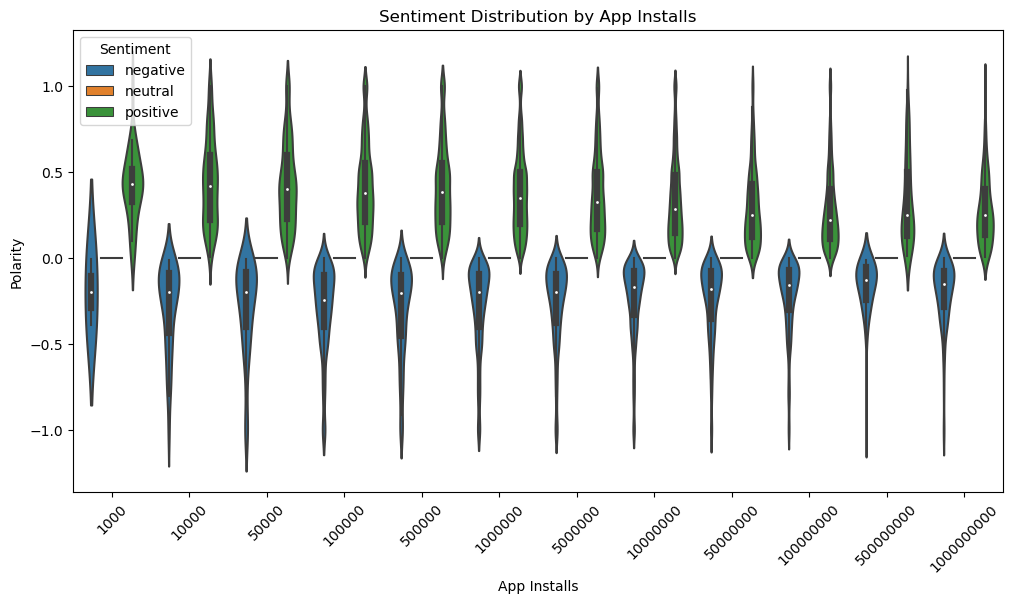

In [39]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Installs', y='Polarity', hue='Sentiment', data=merged_df)
plt.title('Sentiment Distribution by App Installs')
plt.xlabel('App Installs')
plt.ylabel('Polarity')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

In [47]:
#save cleaned dataset
merged_df.to_csv('merged_data.csv')

# Summary

Sentiment Distribution by Category: The stacked bar chart showed the distribution of sentiment (neutral, positive, negative) for each app category. It provided insights into how different app categories are perceived by users in terms of sentiment, with some categories having higher positive sentiment and others having higher negative sentiment.


Sentiment Distribution by App Installs: The violin plot demonstrated the distribution of sentiment scores for different app install categories. It revealed that user sentiment tended to be slightly higher for apps with higher install counts, but the difference was not significant.

Overall, the visualizations provided insights into the sentiment distribution and its relationship with app categories, app size, and app installs. These findings can help businesses understand user sentiment patterns and make informed decisions regarding app development, marketing, and customer engagement strategies. Further analysis and consideration of other variables may be necessary to gain a more comprehensive understanding of user sentiment and its impact on app popularity and ratings.


# what business decision can be made from here
Based on the findings from the sentiment analysis of the merged dataset of apps and user reviews, several potential business decisions can be made:

Improve User Sentiment: Apps with lower sentiment scores, particularly those with higher negative sentiment, may require further investigation and improvements to address the issues highlighted by user reviews. This could involve identifying and resolving bugs, enhancing features, improving user interface and experience, and addressing user complaints or feedback.

Enhance App Marketing: Apps with higher positive sentiment scores can be leveraged for marketing and promotion efforts. Positive user reviews can be highlighted in app descriptions, social media posts, and other marketing materials to attract more users and increase app downloads.

Monitor User Feedback: Regularly monitoring user reviews and sentiment scores can help businesses stay informed about user perceptions, feedback, and concerns. This can guide ongoing app development efforts and enable timely responses to user feedback, addressing issues, and improving user satisfaction.

Identify Popular App Categories: Understanding the sentiment distribution across different app categories can help businesses identify popular app categories that are generally well-received by users. This can guide decisions on app development focus, investment, and marketing strategies.